In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('ai4i2020.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df = pd.get_dummies(df, columns=[ 'Type'], drop_first=True)

df.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,0,1
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1,0
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1,0
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1,0
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1,0


In [7]:
# Correlation matrix
correlation_matrix = df.corr()

# Correlation with the target variable
correlation_with_target = correlation_matrix['Machine failure'].abs().sort_values(ascending=False)

print(correlation_with_target)


Machine failure            1.000000
HDF                        0.575800
OSF                        0.531083
PWF                        0.522812
TWF                        0.362904
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Rotational speed [rpm]     0.044188
Process temperature [K]    0.035946
Type_L                     0.035643
UDI                        0.022892
Type_M                     0.022432
RNF                        0.004516
Name: Machine failure, dtype: float64


C:\Users\pc\AppData\Local\Temp\ipykernel_4552\2329772347.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


 The correlation results provide insights into the relationship between each feature and the target variable ('Machine failure'). Here are some observations:

- **Strong Correlations:**
  - 'HDF' (Heat Dissipation Failure) has a relatively strong positive correlation (0.576) with 'Machine failure.'
  - 'OSF' (Overstrain Failure) and 'PWF' (Power Failure) also show strong positive correlations (0.531 and 0.523, respectively).

- **Moderate Correlations:**
  - 'TWF' (Tool Wear Failure) has a moderate positive correlation (0.363) with 'Machine failure.'
  - 'Torque [Nm]' and 'Tool wear [min]' show moderate positive correlations (0.191 and 0.105, respectively).

- **Weak Correlations:**
  - 'Air temperature [K]', 'Rotational speed [rpm]', 'Process temperature [K]', 'Type_L', 'UDI', 'Type_M', and 'RNF' have relatively weak correlations with 'Machine failure.'

### Recommendations:

1. **Important Features:**
   - Consider 'HDF,' 'OSF,' and 'PWF' as potentially important features due to their strong positive correlations.

2. **Exploration:**
   - Explore the impact of 'TWF,' 'Torque [Nm],' and 'Tool wear [min]' further as they show moderate positive correlations.

3. **Less Relevant Features:**
   - Features with weak correlations ('Air temperature [K],' 'Rotational speed [rpm],' 'Process temperature [K],' 'Type_L,' 'UDI,' 'Type_M,' and 'RNF') may have less impact on predicting 'Machine failure.'

4. **Modeling:**
   - Focus on features with stronger correlations in your initial model.
   - Consider using tree-based models (like Random Forest) that inherently capture feature importance.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select relevant features
selected_features = ['HDF', 'OSF', 'PWF', 'TWF', 'Torque [Nm]', 'Tool wear [min]', 'Type_M' ,'Type_L']

# Create feature matrix (X) and target vector (y)
X = df[selected_features]
y = df['Machine failure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Display feature importance
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Accuracy: 0.9990

Confusion Matrix:
[[1939    0]
 [   2   59]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000


Feature Importance:
HDF                0.323092
OSF                0.217106
PWF                0.199420
TWF                0.111907
Torque [Nm]        0.101858
Tool wear [min]    0.043427
Type_L             0.001824
Type_M             0.001365
dtype: float64


Feature Importance:
The feature importance results suggest that the Random Forest model considers the following features as most influential in predicting machine failures:

'HDF' (Heat Dissipation Failure) with an importance of 32.31%.
'OSF' (Overstrain Failure) with an importance of 21.71%.
'PWF' (Power Failure) with an importance of 19.94%.
'TWF' (Tool Wear Failure) with an importance of 11.19%.
'Torque [Nm]' with an importance of 10.19%.
'Tool wear [min]' with an importance of 4.34%.

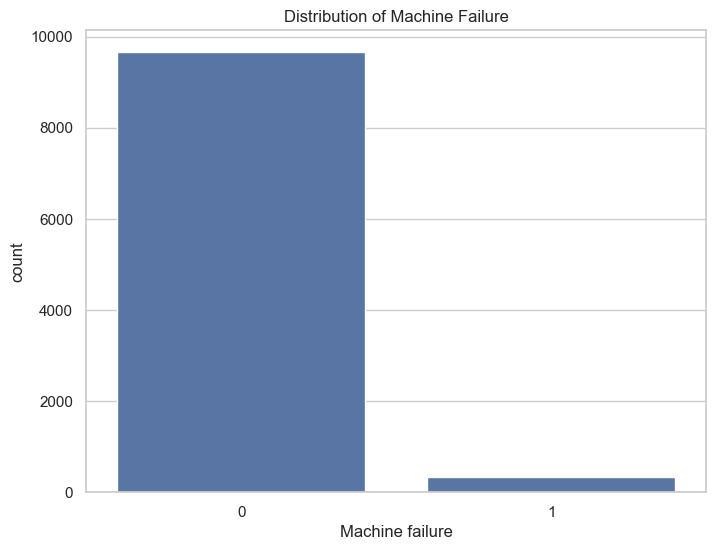

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the distribution of 'Machine failure'
plt.figure(figsize=(8, 6))
sns.countplot(x='Machine failure', data=df)
plt.title('Distribution of Machine Failure')
plt.show()


C:\Users\pc\AppData\Local\Temp\ipykernel_4552\1283778194.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


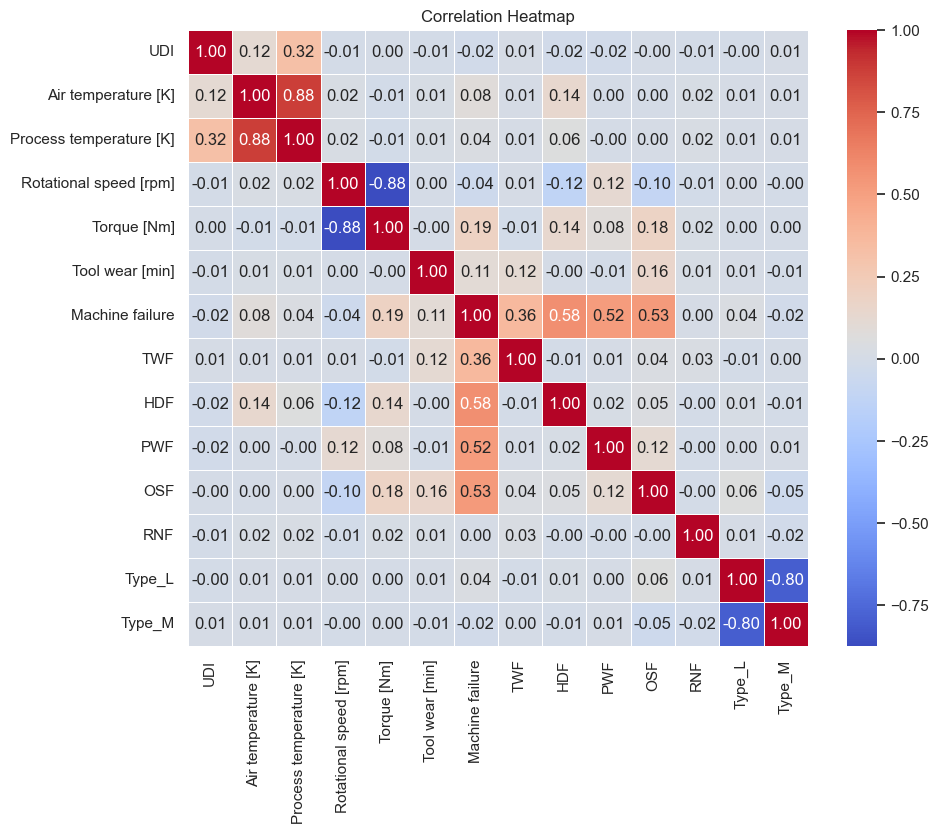

In [10]:
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


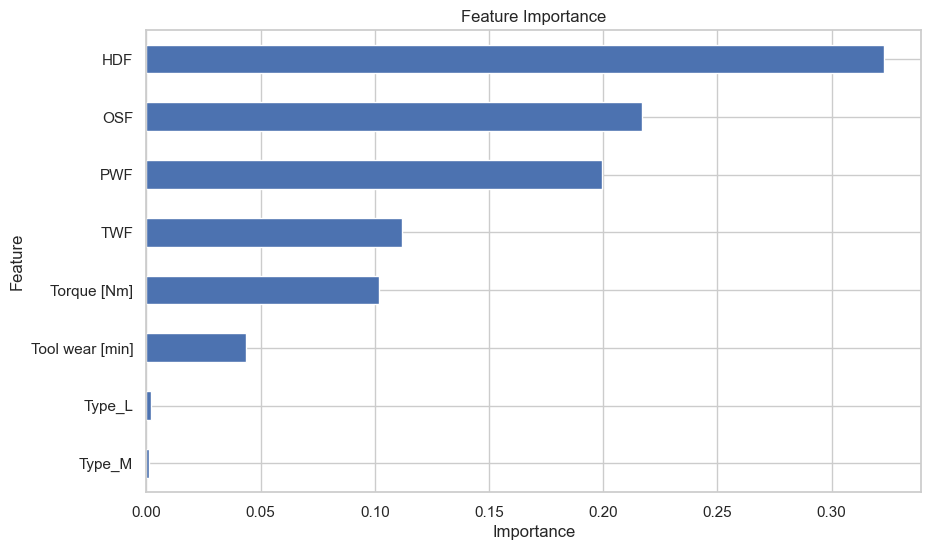

In [11]:
# Plot the feature importance bar chart
plt.figure(figsize=(10, 6))
feature_importance.sort_values(ascending=True).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


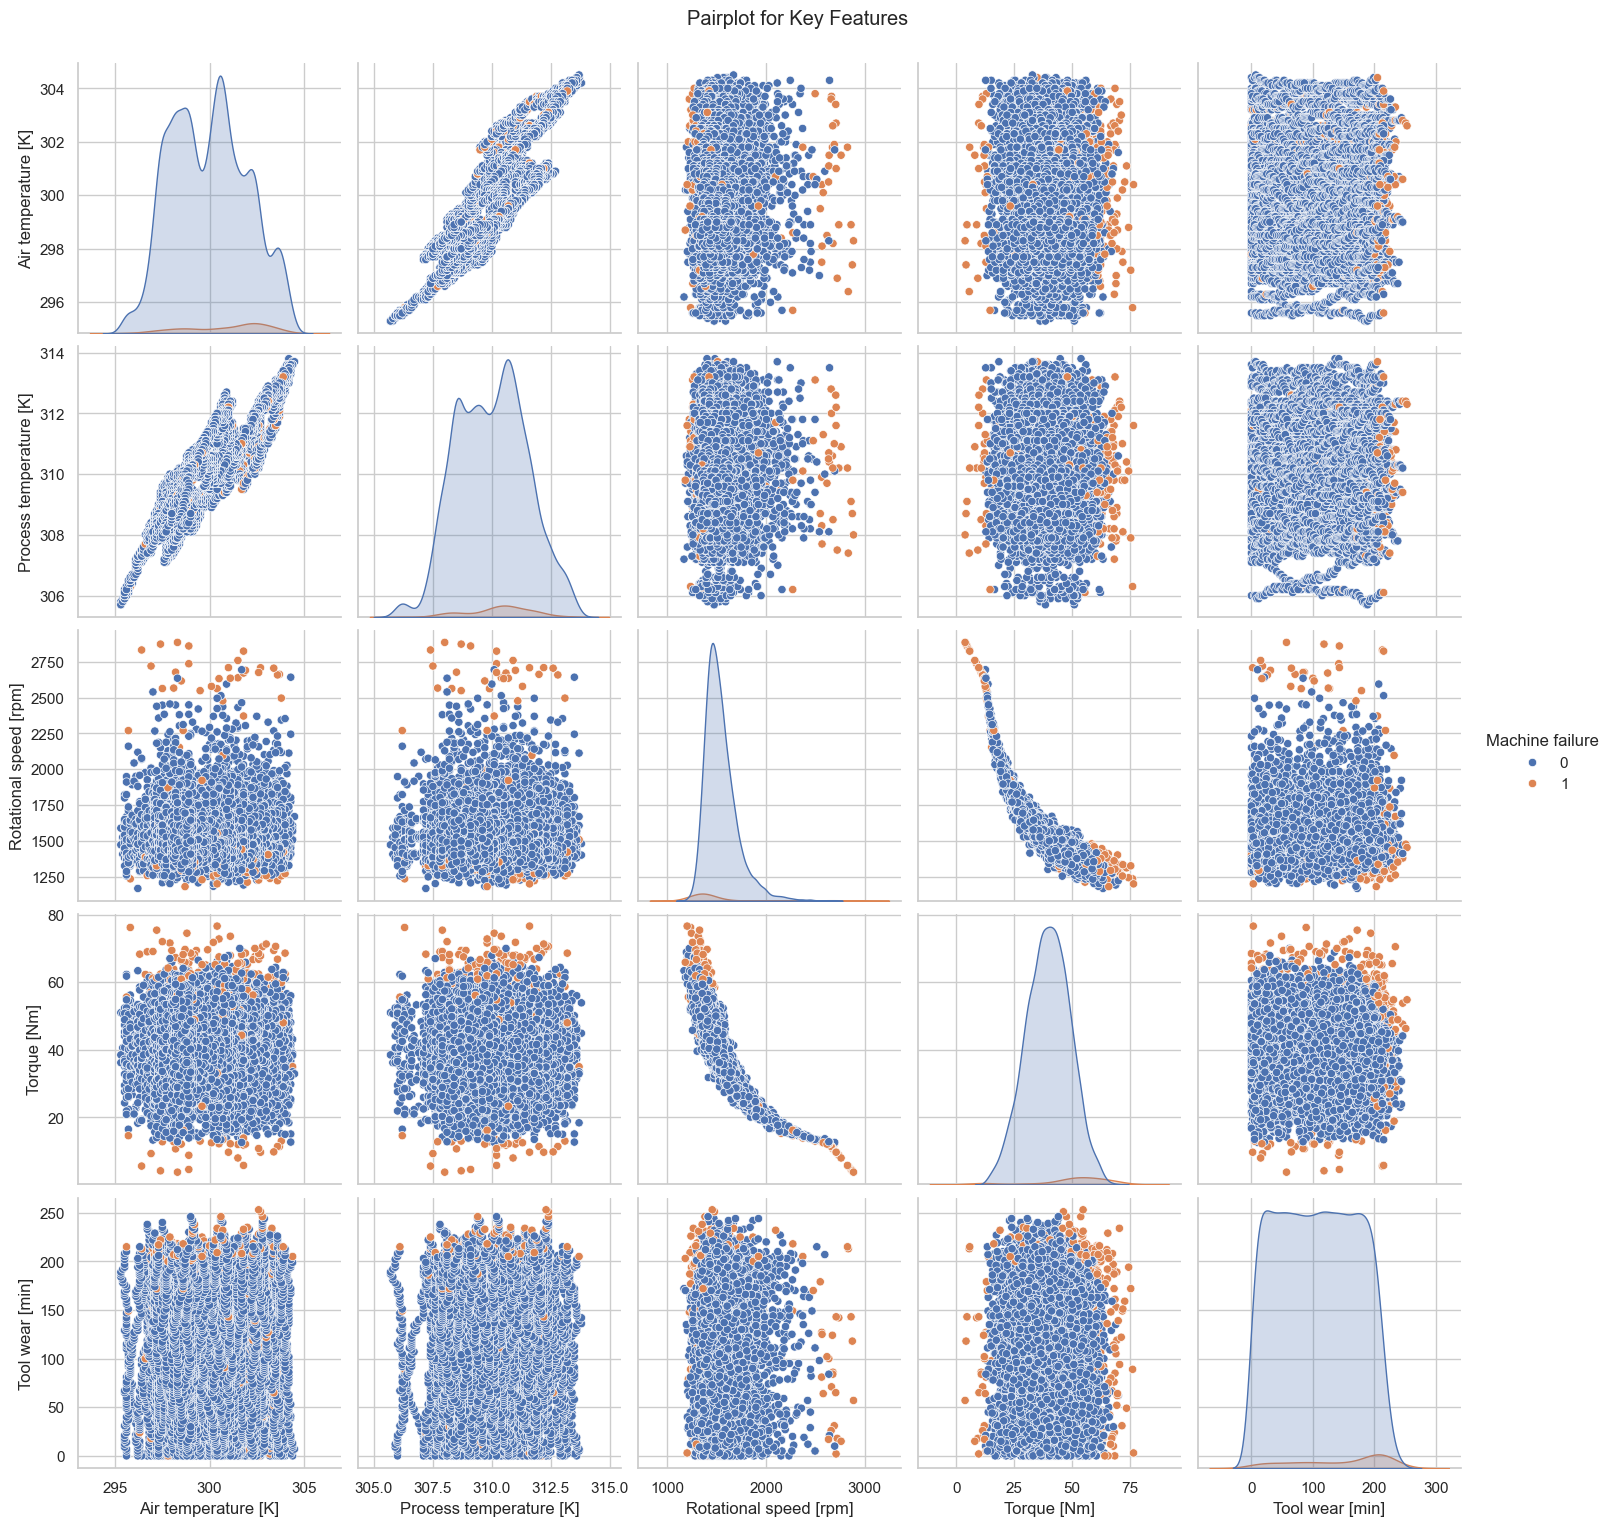

In [12]:
# Select key features for pairplot
key_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Create a pairplot
sns.pairplot(df, hue='Machine failure', vars=key_features, height=3)
plt.suptitle('Pairplot for Key Features', y=1.02)
plt.show()


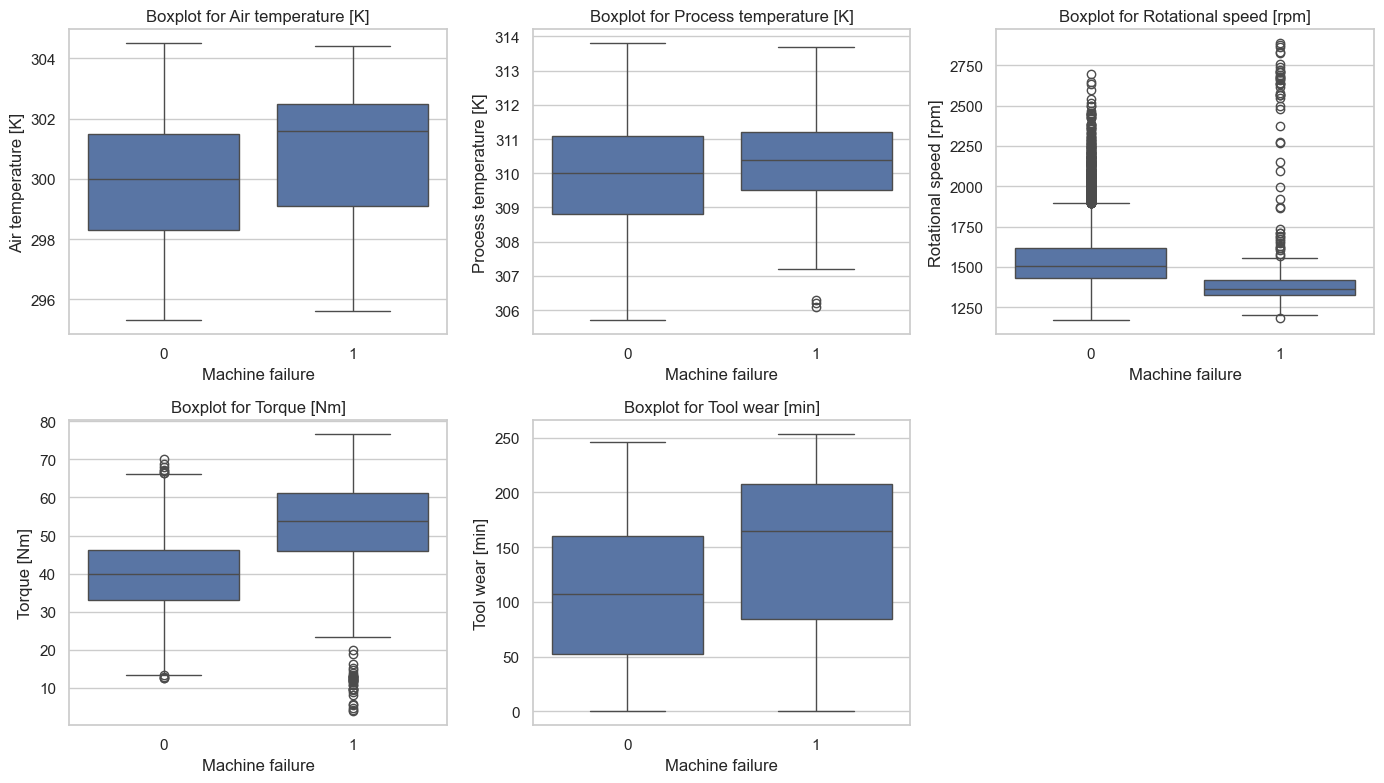

In [13]:
# Create box plots for key features by 'Machine Failure' status
plt.figure(figsize=(14, 8))

for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Machine failure', y=feature, data=df)
    plt.title(f'Boxplot for {feature}')

plt.tight_layout()
plt.show()


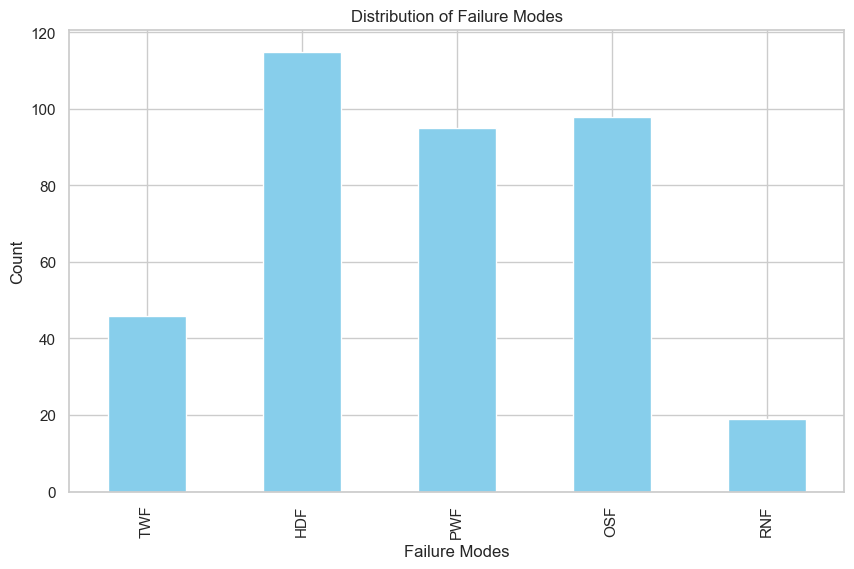

In [14]:
# Bar plot for Failure Modes
failure_modes = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df[failure_modes].sum()

plt.figure(figsize=(10, 6))
failure_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Failure Modes')
plt.xlabel('Failure Modes')
plt.ylabel('Count')
plt.show()


C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
C:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=vector, **plot_kwargs)
C:\Users\pc\AppData\Loca

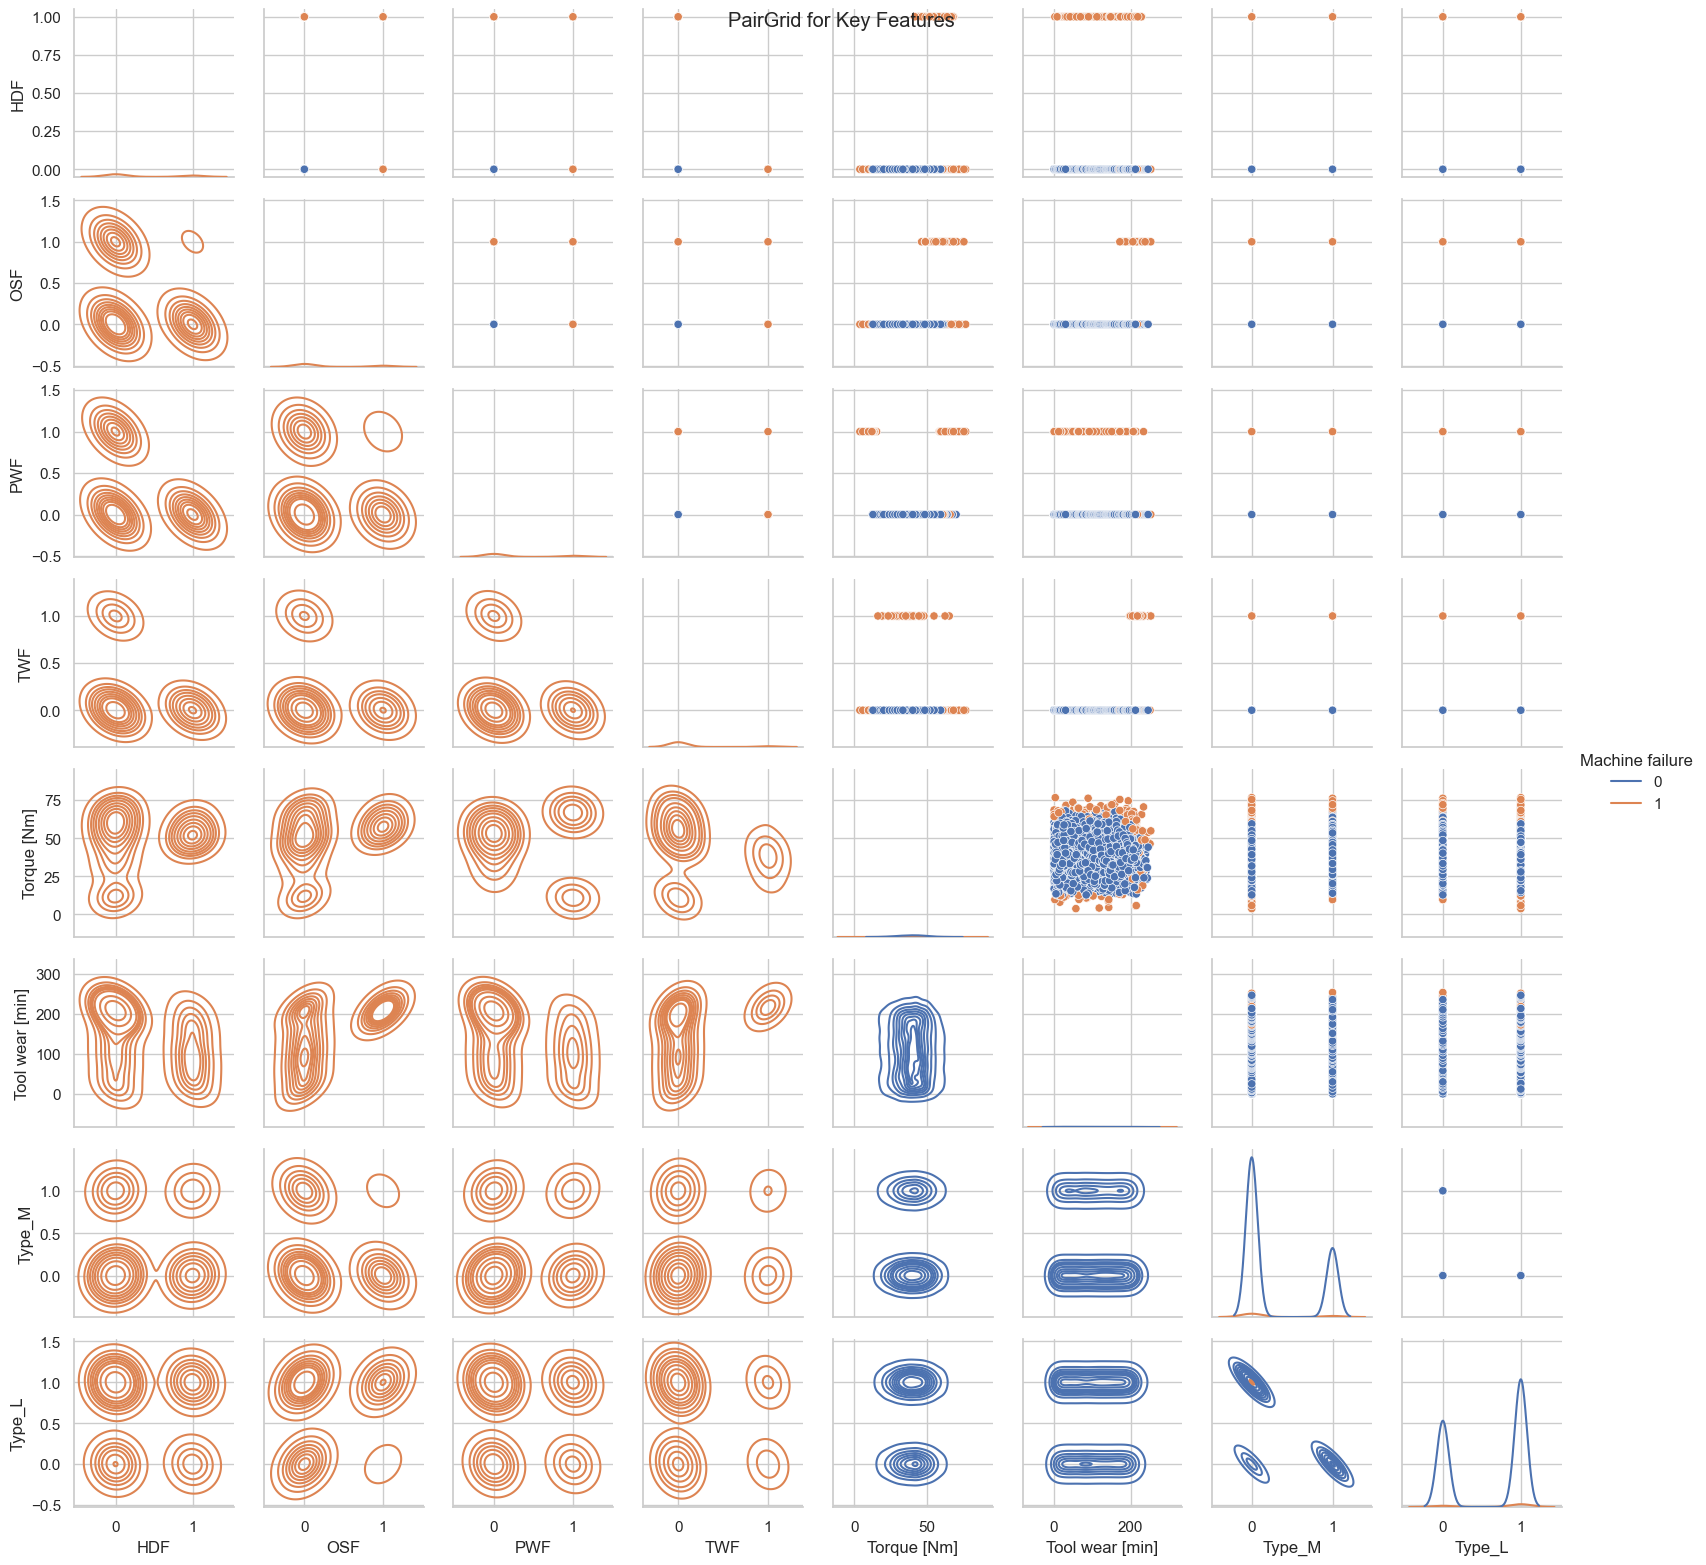

In [15]:
# PairGrid for key features
key_features = ['HDF', 'OSF', 'PWF', 'TWF', 'Torque [Nm]', 'Tool wear [min]', 'Type_M', 'Type_L', 'Machine failure']
g = sns.PairGrid(df[key_features], hue='Machine failure', height=2)
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot)
g.add_legend()
plt.suptitle('PairGrid for Key Features')
plt.show()
